## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing, linear_model
from ipywidgets import interact

## Leer CSV
El csv contiene los tweets obtenidos

In [2]:
df = pd.read_csv('./tweets.csv')

## Convertir a numeros
Convertir 1K -> 1000

In [3]:
df.reply = (df.reply.replace(r'[KM]+$', '', regex=True).astype(float) * \
   ....:           df.reply.str.extract(r'[\d\.]+([KM]+)', expand=False)
   ....:             .fillna(1)
   ....:             .replace(['K','M'], [10**3, 10**6]).astype(int))

df.retweet = (df.retweet.replace(r'[KM]+$', '', regex=True).astype(float) * \
   ....:           df.retweet.str.extract(r'[\d\.]+([KM]+)', expand=False)
   ....:             .fillna(1)
   ....:             .replace(['K','M'], [10**3, 10**6]).astype(int))

df.like = (df.like.replace(r'[KM]+$', '', regex=True).astype(float) * \
   ....:           df.like.str.extract(r'[\d\.]+([KM]+)', expand=False)
   ....:             .fillna(1)
   ....:             .replace(['K','M'], [10**3, 10**6]).astype(int))

## Obtener información de interes
Se obtiene el numero de palabras que existe en cada tweet, cuantas menciones a otras cuentas existen(@), cuantos hashtags(#) y cuantos enlances tienen

In [4]:
df['caracteres'] = df.comment.apply(lambda x: len(str(x)))
df['menciones'] = df.comment.apply(lambda x: str(x).count('@'))
df['hashtags'] = df.comment.apply(lambda x: str(x).count('#'))
df['enlaces'] = df.comment.apply(lambda x: str(x).count('http'))
df.dropna()
df.head()

,username,comment,reply,retweet,like,caracteres,menciones,hashtags,enlaces
0,Presidencia ECU,"El presidente \n@LassoGuillermo\n, durante su ...",166.0,556.0,4500.0,233,1,1,0
1,Guillermo Lasso,Hoy tuve la oportunidad de dialogar con \n@leo...,581.0,874.0,4200.0,272,2,2,0
2,Guillermo Lasso,Fue un honor recibir a representantes de \n@US...,207.0,638.0,2800.0,282,2,2,0
3,Guillermo Lasso,Esta noche mantuvimos la primera reunión del C...,368.0,1100.0,5800.0,277,0,1,0
4,Guillermo Lasso,El Decreto que elimina los registros de crédit...,256.0,875.0,3500.0,266,0,2,0


## Gráfico de los datos

Grafico interactivo para comparar diferentes factores de los tweets

In [5]:
resumen = df.groupby('username').mean()
resumen = resumen.reset_index()
min_max_scaler = preprocessing.MinMaxScaler()
resumen.reply = min_max_scaler.fit_transform(np.array(resumen.reply).reshape(-1, 1))
resumen.retweet = min_max_scaler.fit_transform(np.array(resumen.retweet).reshape(-1, 1))
resumen.like = min_max_scaler.fit_transform(np.array(resumen.like).reshape(-1, 1))
resumen.caracteres = min_max_scaler.fit_transform(np.array(resumen.caracteres).reshape(-1, 1))
resumen.menciones = min_max_scaler.fit_transform(np.array(resumen.menciones).reshape(-1, 1))
resumen.hashtags = min_max_scaler.fit_transform(np.array(resumen.hashtags).reshape(-1, 1))
resumen.enlaces = min_max_scaler.fit_transform(np.array(resumen.enlaces).reshape(-1, 1))

In [6]:
@interact
def scatter_plot(var1=resumen.select_dtypes('number').columns, 
                 var2=resumen.select_dtypes('number').columns[1:]):
    a = resumen[var1]
    b = resumen[var2]
    
    dfbars = pd.DataFrame({var1: a.tolist(),
                   var2: b.tolist()}, index=resumen.username.tolist())
    ax = dfbars.plot.bar()

interactive(children=(Dropdown(description='var1', options=('reply', 'retweet', 'like', 'caracteres', 'mencion…

## Regresión lineal

Se busca predecir la cantidad de retweets que tendran los tweets relacionados al presidente electo Guillermo Lasso, para esta prediccion se tomaron como valores de entrada el numero de caracteres del tweet y las menciones que se usan

In [7]:
X = df[['caracteres', 'menciones']]
y = df['retweet']

In [8]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [9]:
regr.predict([[250, 3]])

array([417.45057871])

In [10]:
pred = regr.predict(X)

## Grafico regresion
Al contar con 2 entradas y 1 salida se realizo un grafico en 3d en el que se comparan los datos reales vs los datos que la regresion predice

<IPython.core.display.Javascript object>


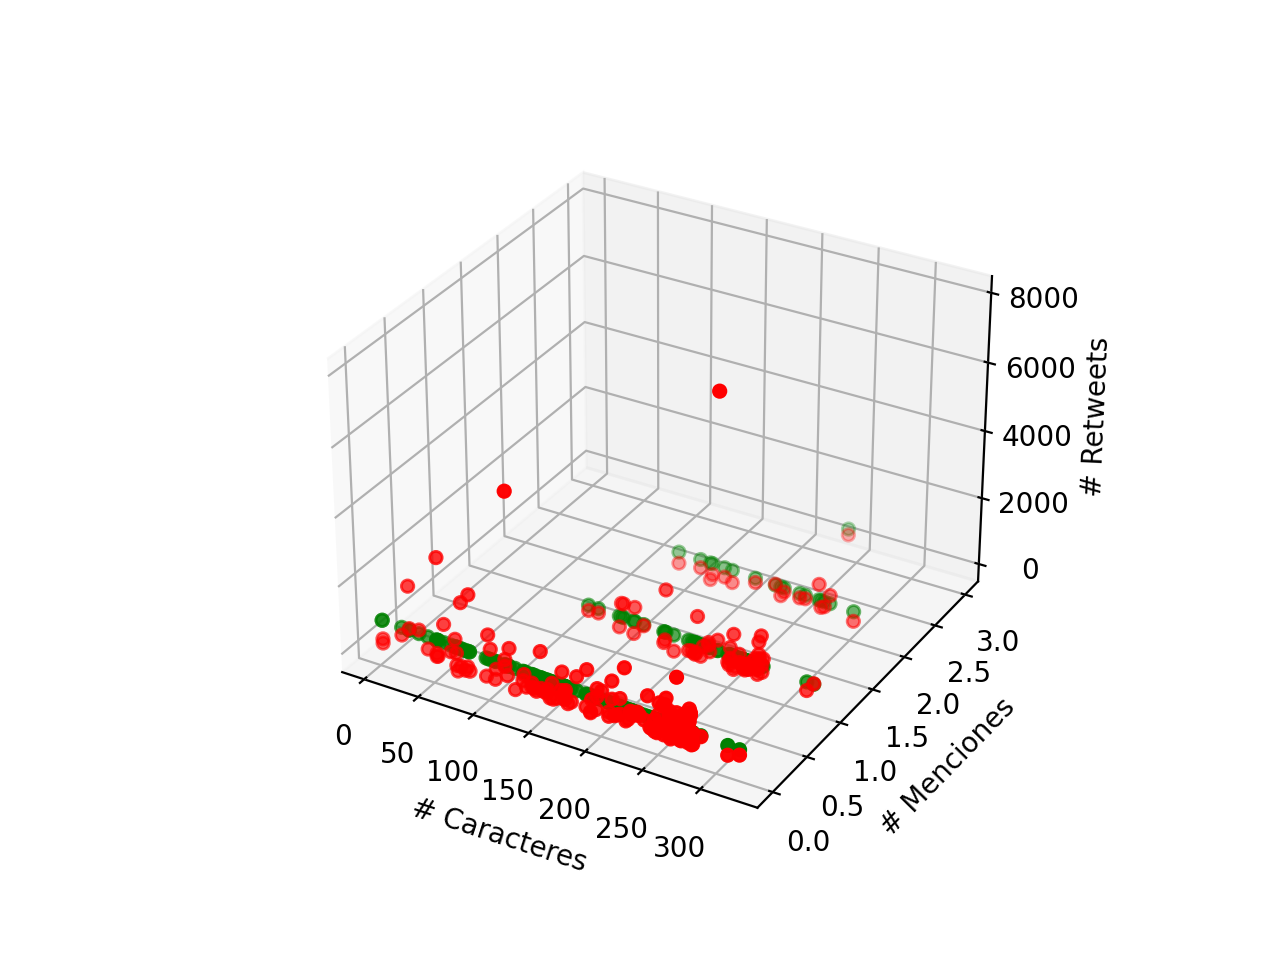

In [11]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(list(X.caracteres), list(X.menciones), y, c='r', marker='o')
ax.scatter(list(X.caracteres), list(X.menciones), pred, c='g', marker='o')

ax.set_xlabel('# Caracteres')
ax.set_ylabel('# Menciones')
ax.set_zlabel('# Retweets')

plt.show()

# Simulacion

Para la simulacion se realizo un programa en python en el archivo main.py

Datos de recinto electoral obtenidos de:
http://portal.cne.gob.ec/images/d/2021/Distributivo_recintos_e/Distributivo_de_recintos_final_2021.xls

Se escogio el recinto Unidad Educativo Tecnico Salesiano que cuenta con 7000 miembros y 8 juntas

El tiempo de la simulacion dura 864000 minutos (600 dias)
